# GDP/ RQ1 Analysis

# Purpose 
The purpose of this notebook is to analyise GDPs effect on Rating Share. The Graphs created will be seen in both the presentation and the final report. Not everything in this notebook will be used in the final report and presentation. 

# Datasets
Uses: <br>
** gdp.csv ** from 300_GDP_Prep <br>
Creates: <br>
An analysis of GDP including Markdown breakdowns of results as well as graphs showcasing results. 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.patches as patches
import string
import sys, os
import seaborn as sns
import operator
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import warnings
from pandas.tools.plotting import table

# Setting out standard formatts for the Graphs below 

In [2]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20, figsize=(15, 7.5))

In [3]:
# Ensure the file exists
if not os.path.exists(  r"..\..\data\final\gdp.csv" ):
    print("Missing dataset file")

Missing dataset file


In [4]:
# read the medal csv into a dataframe
df = pd.read_csv(  r"..\..\data\final\gdp.csv", encoding = "ISO-8859-1")

FileNotFoundError: File b'..\\..\\data\\final\\gdp.csv' does not exist

# Getting Growth Ranges for GDP
These will be the percentage difference between the GDP of a country for the first year they competed in the olympics compared with the last year. 

In [ ]:
# Creting a new df for the calculations 
df1 = df

In [ ]:
# Sorting the df by the country and year 
df = df.sort_values(by=['NOC', 'Year']).reset_index()

In [ ]:
df = df[['Year', 'NOC', 'GDP']]

In [66]:
df.head(10)

,Year,NOC,GDP
0,2008,AFG,1.019053e+10
1,2012,AFG,2.053654e+10
2,1984,ALG,5.369828e+10
3,1992,ALG,4.800330e+10
4,1996,ALG,4.694150e+10
5,2000,ALG,5.479025e+10
6,2008,ALG,1.710007e+11
7,2012,ALG,2.090590e+11
8,2016,ALG,1.590491e+11
9,1960,ARG,2.117186e+10


# GDP Growth Ranges 
Calculating these growth ranges 

In [67]:
diffDict = {}
lastNOC = df['NOC'].iloc[0]
firstGDP = df['GDP'].iloc[0]

for x, row in df.iterrows():
    
        
    # current year and host to compare with the last years 
    curryear = df['Year'].iloc[x]
    # varaible for the country 
    currNOC = df['NOC'].iloc[x]
    
    
    if(currNOC != lastNOC):
        lastGDP = df['GDP'].iloc[x - 1]
        difference = (lastGDP - firstGDP) / firstGDP
        firstGDP = df['GDP'].iloc[x]
        diffDict.update({df['NOC'].iloc[x-1]: difference})
    
    lastNOC = df['NOC'].iloc[x]
    
difference = (lastGDP - firstGDP) / firstGDP
diffDict.update({df['NOC'].iloc[x-1]: difference})

# Dictionary for the Growth Ranges
The dictionary below contains each country as a key with there GDP growth as the corresponding value. 

In [68]:
diffDict

{'AFG': 1.015257594408441,
 'ALG': 1.9619030625499796,
 'ARG': 24.764206707007929,
 'ARM': 5.6202280167459682,
 'AUS': 63.787496634308255,
 'AUT': 58.277739959061542,
 'AZE': 10.913975158140889,
 'BAH': 41.23174999999997,
 'BAR': 0.0,
 'BDI': 2.4601977915379352,
 'BEL': 39.137820088384366,
 'BER': 0.0,
 'BLR': 2.1748331053510608,
 'BOT': 0.0,
 'BRA': 117.43844951264326,
 'BRN': 0.04649732652697685,
 'BUL': 2.1665175157209755,
 'BWI': 0.0,
 'CAN': 36.226379392268122,
 'CHI': 5.8984988883002334,
 'CHN': 42.082498458675545,
 'CIV': 4.3163597992412877,
 'CMR': 26.637516597808521,
 'COL': 31.57419743254248,
 'CRC': 1.4653871750862135,
 'CRO': 1.108502710057359,
 'CUB': 19.724000704186203,
 'CYP': 0.0,
 'CZE': 1.9156207089463821,
 'DEN': 48.112219913119588,
 'DJI': 0.0,
 'DOM': 5.9294079189950999,
 'ECU': 1.4483339539926183,
 'EGY': 323.9886664491039,
 'ERI': 0.0,
 'ESP': 101.4885767367346,
 'EST': 5.3826337473445456,
 'ETH': 233.56077190340741,
 'EUA': -0.3402409486373304,
 'EUNS': 0.0,
 'E

# Filling in these GDP growth percentages 

In [69]:
df1['GDP_Growth'] = None
for x, row in df1.iterrows():
    
    Year = df1['Year'].iloc[x]
    NOC = df1['NOC'].iloc[x]
    GDP = df1['GDP'].iloc[x]
    df1.loc[x, 'GDP_Growth'] = diffDict[NOC]
        
        

# GDP Anaylsis 
For our RQ3 we are examining the effect that GDP might have on a countries Rating share in  the Olympics. We will do this analysis in this order. 
* GDP Range
* GDP Distribution 
* Ratings on average per billion GDP
* Outliers
* Effect 
 - GDP
 - GDP wihtout Outliers
 - GDP per Capita 
 - GDP per capita without Outliers 


# GDP Range 
First we'll get values for our range which will be the max GDP, the min GDP and the mean GDP then we can plot them on a bar chart. 

In [70]:
# Getting Range values 
rangeArr = df1.sort_values('GDP').reset_index().iloc[[0,-1]].set_index('Country').GDP
rangeArr['Mean'] = df1.GDP.mean()
rangeArr

Country
Tunisia          8.697749e+07
United States    1.862448e+13
Mean             5.623613e+11
Name: GDP, dtype: float64

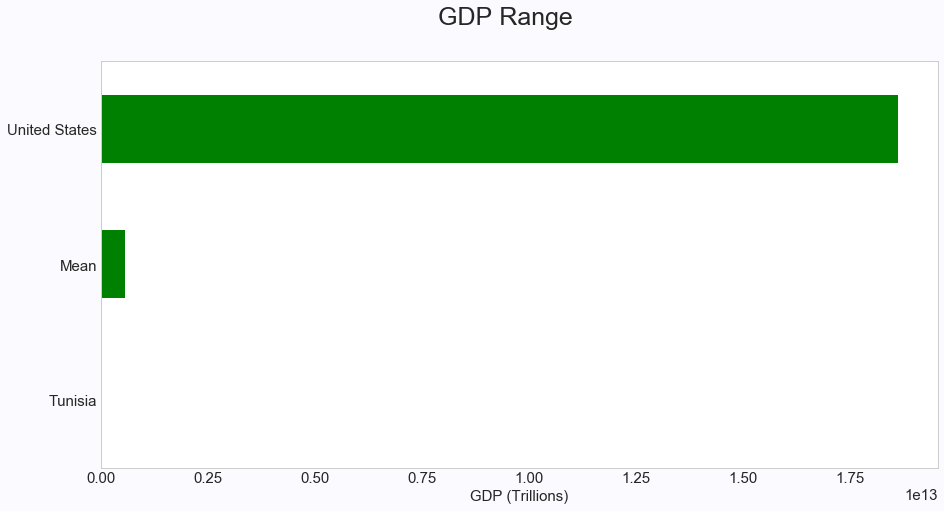

In [71]:
# Plotting the range 
fig, ax = plt.subplots(facecolor='#fafaff')

rangeArr.sort_values().plot(kind='barh',color='Green')

plt.grid()
plt.xlabel('GDP (Trillions)')
plt.ylabel('')
fig.suptitle('GDP Range', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/GDPRange.png')

# GDP Distribution 
In order to showcase the GDP distribution we will plot the GDP column on a histogram and show the mean GDP with a line in the graph. 

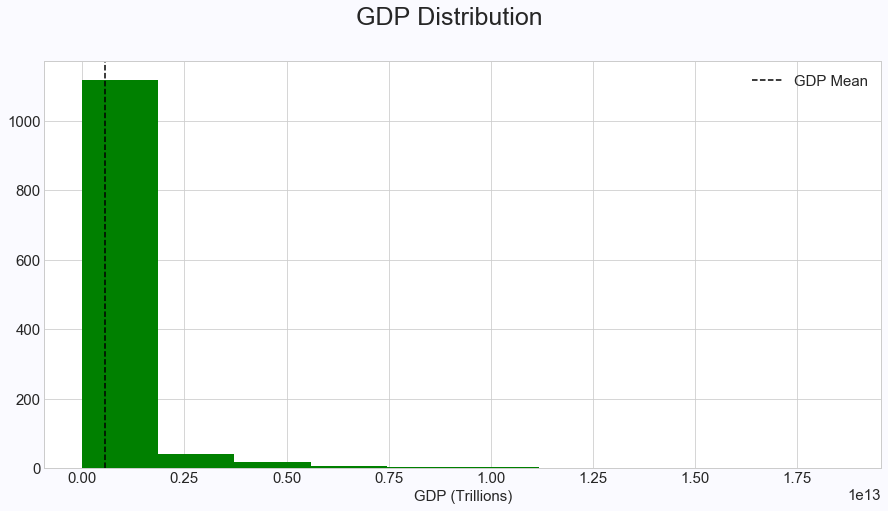

In [72]:
fig, ax = plt.subplots(facecolor='#fafaff')
df1.GDP.hist(color='Green')


plt.axvline(x=df1.GDP.mean(),color='black',label='GDP Mean',linestyle='--')

plt.legend()
plt.xlabel('GDP (Trillions)')
fig.suptitle('GDP Distribution', fontsize=25)
ax.set_axisbelow(True)

plt.show()
fig.savefig('../../data/final/Graphs/GDPDist.png')

# Ratings over GDP Per Capita

In [73]:
avgGDP =  df1.groupby(['Country'])[["GDP", 'GDP_PerCapita', 'Rating_Share']].mean()

In [74]:
avgGDP['Ratings_Relative'] = avgGDP['Rating_Share'] / (avgGDP['GDP_PerCapita'])

In [75]:
temp = avgGDP['Ratings_Relative'].sort_values().tail(10)
temp['United States'] = avgGDP['Ratings_Relative']['United States']
temp['Soviet Union'] = avgGDP['Ratings_Relative']['Soviet Union']

In [76]:
temp = temp.sort_values()

In [77]:
temp

Country
United States             0.000005
India                     0.000012
Yugoslavia                0.000012
Ethiopia                  0.000012
Zimbabwe                  0.000012
China                     0.000017
Germany (Split)           0.000021
Unified Team              0.000028
United Team of Germany    0.000035
Pakistan                  0.000053
Soviet Union              0.000132
Name: Ratings_Relative, dtype: float64

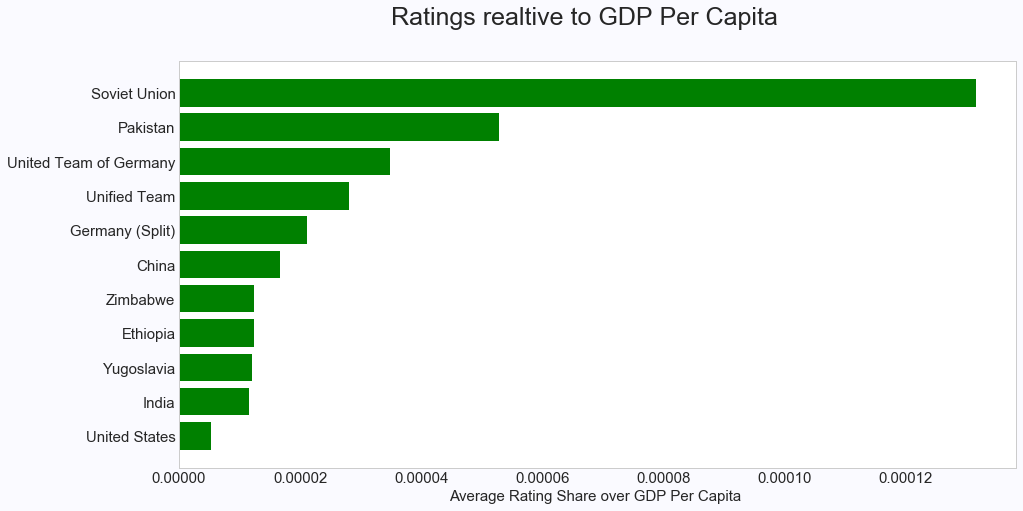

In [78]:
fig, ax = plt.subplots(facecolor='#fafaff')
ind = np.arange(11)

plt.legend()
plt.grid()
plt.xlabel('Average Rating Share over GDP Per Capita ')
plt.ylabel('')
fig.suptitle('Ratings realtive to GDP Per Capita', fontsize=25)
ax.set_axisbelow(True)

ax.barh(ind, temp.values.tolist() , color='Green')
ax.set_yticks(ind)
ax.set_yticklabels(temp.index.tolist())

plt.show()
fig.savefig('../../data/final/Graphs/GDPPCRelative.png')

In [79]:
# Ratings average over GDP per billion

In [80]:
avgGDP['Ratings_Relative'] = avgGDP['Rating_Share'] / (avgGDP['GDP'] / 1000000000)

In [81]:
temp = avgGDP['Ratings_Relative'].sort_values().tail(10)
temp['United States'] = avgGDP['Ratings_Relative']['United States']
temp['Soviet Union'] = avgGDP['Ratings_Relative']['Soviet Union']

In [82]:
temp = temp.sort_values()

In [83]:
temp

Country
United States          0.000019
Soviet Union           0.000515
Djibouti               0.000825
Jamaica                0.000871
Bermuda                0.000999
Paraguay               0.001067
Zimbabwe               0.001261
Brtitsh West Indies    0.001631
Montenegro             0.001781
Fiji                   0.002068
Tonga                  0.002464
Liechtenstein          0.013795
Name: Ratings_Relative, dtype: float64

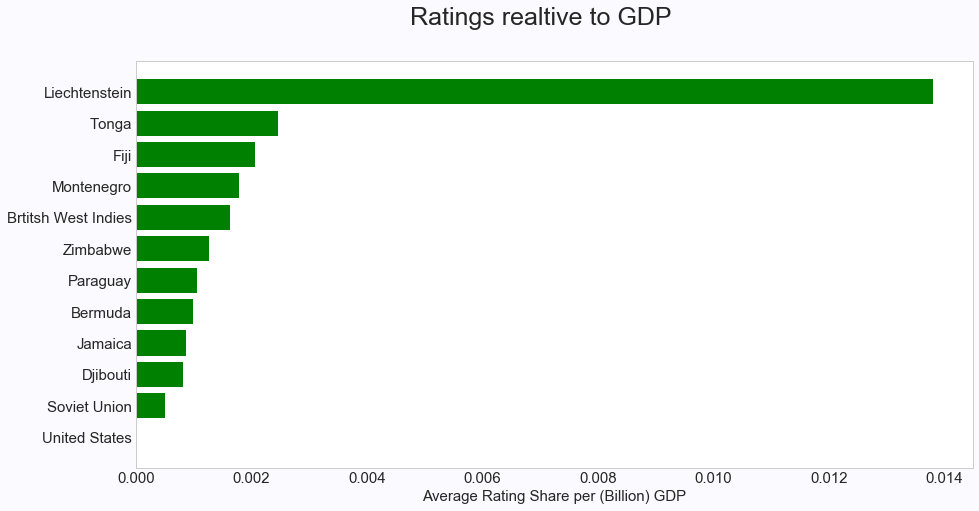

In [84]:
fig, ax = plt.subplots(facecolor='#fafaff')
ind = np.arange(12)

plt.legend()
plt.grid()
plt.xlabel('Average Rating Share per (Billion) GDP')
plt.ylabel('')
fig.suptitle('Ratings realtive to GDP', fontsize=25)
ax.set_axisbelow(True)

ax.barh(ind, temp.values.tolist() , color='Green')
ax.set_yticks(ind)
ax.set_yticklabels(temp.index.tolist())

plt.show()
fig.savefig('../../data/final/Graphs/GDPRelative.png')

# GDP Outliers 
Do get an insight into the GDP outliers we will use a box plot. <br>
The box plot whiskers show us the minium and maxium GDP values thus giving us the range which we saw above. <br> 
The line within the box is the median GDP value or middle value so half the GDP values will be below this median and half will be above it. <br>
The box plot also gives us the 1st to 4th quartiles. <br><br>
** Outliers:**  <br>
As we will see below there are quite alot of outliers but they only apply to a few countries. 

# MatPlotLib Box plot 

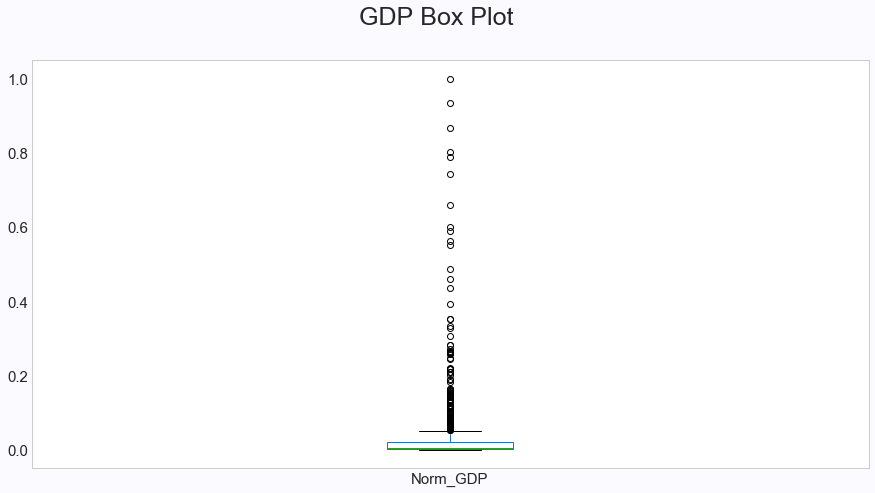

In [85]:
# Plotting the range 
fig, ax = plt.subplots(facecolor='#fafaff')

df1.Norm_GDP.plot(kind='box')
plt.grid()
plt.ylabel('')
fig.suptitle('GDP Box Plot', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/GDPBoxPlot.png')

# Seaborn BoxPlot

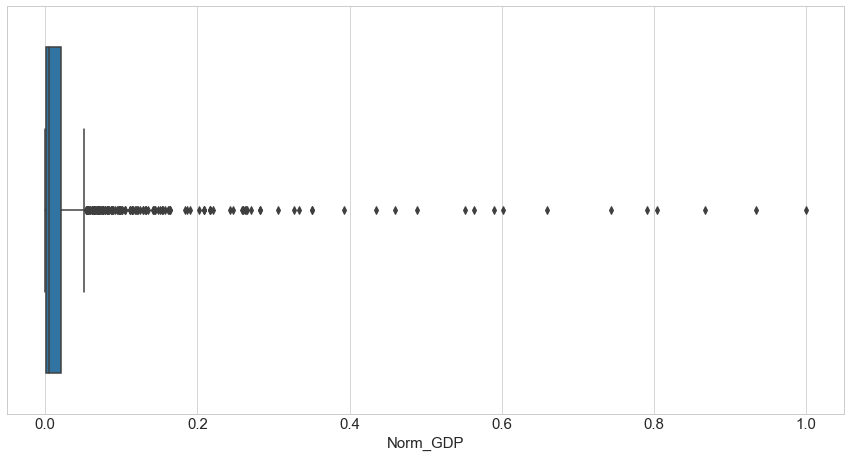

In [86]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df1["Norm_GDP"])

# Outliers for Normalised GDP

In [87]:
# Calculating the outliers for the GDP column 
elements = np.array(df1.Norm_GDP)

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in df1.Norm_GDP if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [88]:
# Removing all countires but the ones with the GDP outliers calculated above
Outdf = df1[~df1['Norm_GDP'].isin(final_list)].reset_index()

** Outlier Countries **
From the List below we can see all the upper GDP outliers come for three countries America, Japan and China. These countries all have massive GDPs so we're not suprised they are outliers. In fact the mean GDP is only 5% of Americas GDP. 

In [89]:
Outdf.Country.unique()

array(['United States', 'Japan', 'China', 'Germany'], dtype=object)

# GDP Effect Overall
** With Outliers ** <br>
First we'll examine the effect with the outliers mentioned above the we'll look at GDPs effect without the outliers. 

** Line of Best Fit **

In [90]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Correlation Between Rating Share and GDP **

In [91]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_GDP)

0.31247349860948975

** Graphing GDPs effect on Rating Share ** 

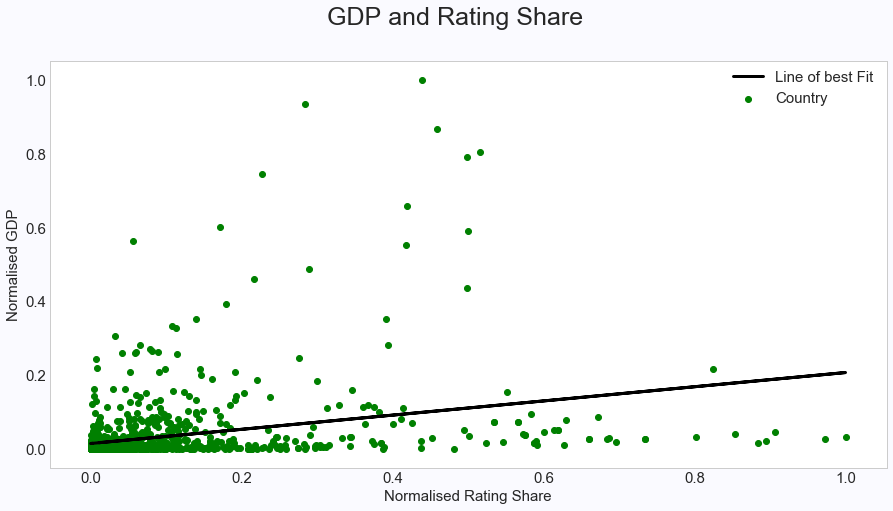

In [92]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('GDP and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)
plt.show()
fig.savefig('../../data/final/Graphs/GDP_Effect.png')

In [93]:
df1[df1['Norm_Rating_Share'] > 0.8]

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC,Norm_Gold_Share,Norm_Total_Medal_Share,Norm_Rating_Share,GDP_Growth
70,1964,Innsbruck,URS,AUS,False,True,892,199,53.0,16.0,...,0.483333,0.248649,0.301075,0.015467,1274.182443,0.012397,0.890351,0.788111,0.884365,2.87764
234,1972,Sapporo,URS,JPN,False,True,801,205,55.0,21.0,...,0.514286,0.225000,0.304455,0.022788,1727.133629,0.016853,0.947368,0.713006,0.894302,2.87764
250,1976,Innsbruck,URS,AUS,False,True,892,231,59.0,19.0,...,0.542857,0.266667,0.330952,0.028092,2054.037359,0.020069,1.000000,0.845333,0.972197,2.87764
310,1980,Lake Placid,URS,USA,False,True,840,232,64.0,22.0,...,0.250000,0.247706,0.272936,0.033308,2350.126637,0.022982,0.460526,0.785118,0.801641,2.87764
343,1980,Moscow,URS,RUS,True,False,4064,1115,340.0,150.0,...,0.409692,0.315368,0.340410,0.033308,2350.126637,0.022982,0.754695,1.000000,1.000000,2.87764
390,1984,Los Angeles,USA,USA,True,False,5263,1566,340.0,182.0,...,0.366935,0.235414,0.280761,0.216952,17134.286017,0.168418,0.675934,0.746079,0.824647,33.2803
408,1984,Sarajevo,URS,BIH,False,True,998,274,74.0,25.0,...,0.391892,0.252252,0.290541,0.041003,2793.929681,0.027348,0.721906,0.799555,0.853395,2.87764
425,1988,Calgary,URS,CAN,False,True,1122,301,78.0,23.0,...,0.465909,0.253788,0.308712,0.046998,3087.276296,0.030233,0.858254,0.804432,0.906816,2.87764


# GDP Effect
** Without Outliers ** <br>
Now we'll look at GDPs effect without the outliers. 


** Creating a df without the Outlier countries above ** 

In [94]:
noOutdf = df1[~df1['Country'].isin(Outdf.Country.unique())].reset_index()

** Line of Best Fit **

In [95]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = noOutdf.Norm_Rating_Share
y = noOutdf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Correlation Between Rating Share and GDP **

In [96]:
# The correlation between GDP and Rating Share 
noOutdf.Norm_Rating_Share.corr(noOutdf.Norm_GDP)

0.25775284823342853

** Graphing GDPs effect on Rating Share ** 

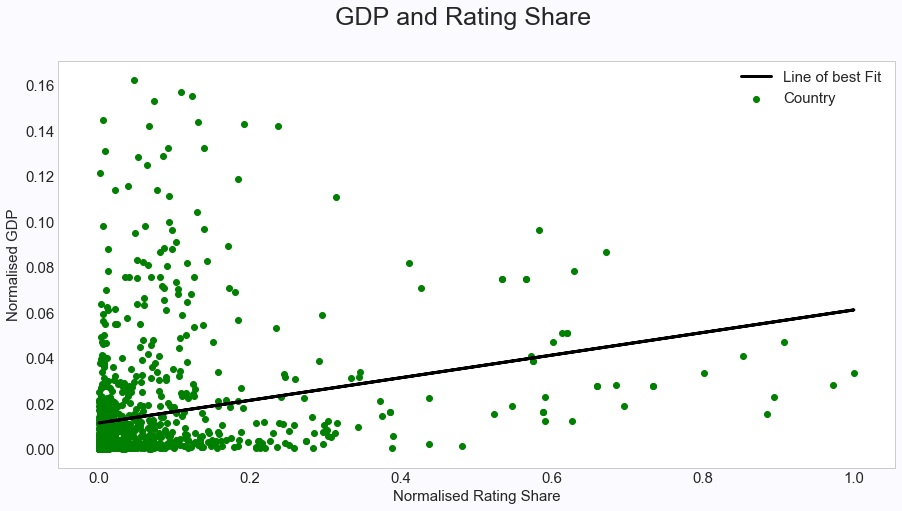

In [97]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('GDP and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_NOEffect.png')

# GDP effect over Individual Games
** Important **
We only discovered the affect that GDP has when we look at each games individually for summer and winter rather than overall. The difference is quite significant.  <br>
We first calculate the correlation between GDP and rating share for every olympics by themsevles. To do this we normailze the GDP values using Min-max nomralisation just for the GDP values of each given olympics seperately and we get the correlation of the nomralised GDP values and the nomralised rating share for each Olympics individually then we get an average correlation of all the individual correlations of each games.  


In [98]:
# Quickly getting all the names of the summer and winter olympics 
winter_list =[]
summer_list =[]

for x, row in df1.iterrows():
    
    city = df1['Host_City'].iloc[x]
    typeG = df1['Summer'].iloc[x]
    
    if(typeG == False):
        winter_list.append(city)
    else:
        summer_list.append(city)    

# getting only unique values for the games         
summer_list = list(set(summer_list))
winter_list = list(set(winter_list))

In [99]:
# creating two dictionaries to record the correlations 
WcorrGDPDict = {}
ScorrGDPDict = {}
OcorrGDPDict = {}
# We'll also create dfs each with there nomralised values 
sumdf = pd.DataFrame()
windf = pd.DataFrame()

In [100]:
# Getting the correlation between GDP and rating share for all the winter games 
warnings.filterwarnings('ignore')
for i in range(len(winter_list)):
    
    temp  = df1[df1['Host_City'] == winter_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 
    # min and max values 
    maxTRate = temp['Rating_Share'].max()
    minTRate = temp['Rating_Share'].min()
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    WcorrGDPDict.update({winter_list[i]: corr})
    
    # Creating the winter df
    
    windf = pd.concat([temp, windf])
    
wAvgCorr = np.mean(list(WcorrGDPDict.values()))

In [101]:
# Getting the correlation between GDP and rating share for all the summer games 
warnings.filterwarnings('ignore')
for i in range(len(summer_list)):
    
    temp  = df1[df1['Host_City'] == summer_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 
    # min and max values 
    maxTRate = temp['Rating_Share'].max()
    minTRate = temp['Rating_Share'].min()
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    ScorrGDPDict.update({summer_list[i]: corr})
    
        # Creating the winter df
    
    sumdf = pd.concat([temp, sumdf])
    
sAvgCorr = np.mean(list(ScorrGDPDict.values()))

In [102]:
# Getting the correlation between GDP and rating share for all the summer and winter games 
city_list = summer_list + winter_list
warnings.filterwarnings('ignore')
for i in range(len(city_list)):
    
    temp  = df1[df1['Host_City'] == city_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 
    # min and max values 
    maxTRate = temp['Rating_Share'].max()
    minTRate = temp['Rating_Share'].min()
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    OcorrGDPDict.update({city_list[i]: corr})
OAvgCorr = np.mean(list(OcorrGDPDict.values()))

In [103]:
# Summer and Winter Games average GDP and Rating share correlation 
OAvgCorr

0.5241360143943834

In [104]:
# Summer Games average GDP and Rating share correlation 
sAvgCorr

0.74429722274323495

In [105]:
# Summer Games average GDP and Rating share correlation 
wAvgCorr

0.28824900544918525

# Graphing the Results 

# Summer Games

In [106]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = sumdf.Norm_Rating_Share
y = sumdf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
# The correlation between GDP and Rating Share 
sumdf.Norm_Rating_Share.corr(sumdf.Norm_GDP)

0.70510348883407714

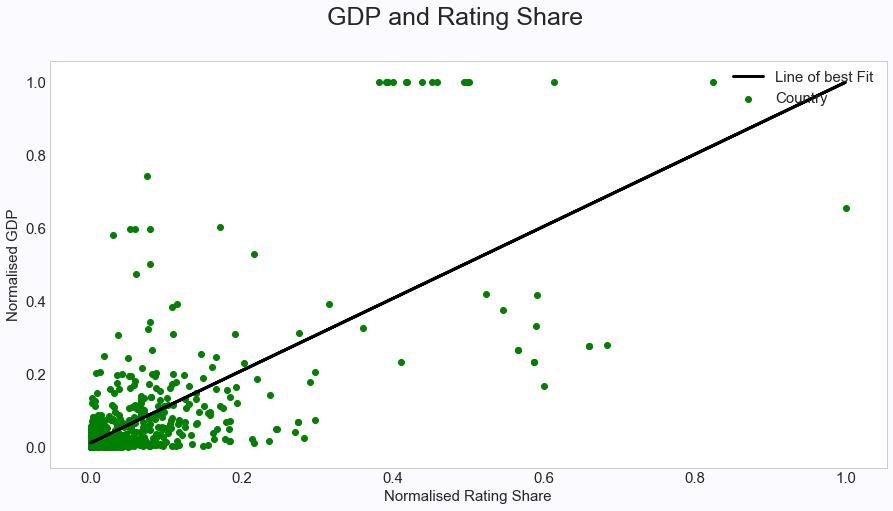

In [108]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('GDP and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_SUMEffect.png')

In [109]:
ScorrGDPDict

{'Athens': 0.76627629871276337,
 'Atlanta': 0.77566897953029279,
 'Barcelone': 0.67882358231617779,
 'Beijing': 0.88575354563557529,
 'London': 0.89832635639813718,
 'Los Angeles': 0.90266114329563862,
 'Mexico': 0.75888650780121747,
 'Montréal': 0.59077690102481495,
 'Moscow': 0.63891143337393208,
 'Munich': 0.64732241410309077,
 'Rio': 0.82538449902956357,
 'Rome': 0.76417787206132848,
 'Seoul': 0.5307290933009996,
 'Sydney': 0.6775469958592768,
 'Tokyo': 0.82321271870571566}

In [110]:
# Creating a dictionary of all the games and there years
Dict = {}
df4 = df1.drop_duplicates(subset=['Host_City', 'Year']).reset_index()
for x, row in df4.iterrows():
    
    
    year = df4['Year'].iloc[x]
    host_city = df4['Host_City'].iloc[x]
    
    Dict.update({host_city: year})

In [111]:
# Creating tables of the correlations

sumCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])
winCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])

sumCorrdf['Host_City'] =  list(ScorrGDPDict.keys())
winCorrdf['Host_City'] =  list(WcorrGDPDict.keys())

for x, row in sumCorrdf.iterrows():
    
    host_city = sumCorrdf['Host_City'].iloc[x]
    
    sumCorrdf.loc[x, 'Year'] = Dict[host_city]
    sumCorrdf.loc[x, 'Correlation'] = ScorrGDPDict[host_city] 
    
    
for x, row in winCorrdf.iterrows():
    
    host_city = winCorrdf['Host_City'].iloc[x]
    
    winCorrdf.loc[x, 'Year'] = Dict[host_city]
    winCorrdf.loc[x, 'Correlation'] = WcorrGDPDict[host_city] 


sumCorrdf = sumCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
sumCorrdf = sumCorrdf.drop(sumCorrdf.columns[[0]], axis=1)
winCorrdf = winCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
winCorrdf = winCorrdf.drop(winCorrdf.columns[[0]], axis=1)

In [112]:
sumCorrdf

,Host_City,Year,Correlation
0,Los Angeles,1984,0.902661
1,London,2012,0.898326
2,Beijing,2008,0.885754
3,Rio,2016,0.825384
4,Tokyo,1964,0.823213
5,Atlanta,1996,0.775669
6,Athens,2004,0.766276
7,Rome,1960,0.764178
8,Mexico,1968,0.758887
9,Barcelone,1992,0.678824


In [113]:
winCorrdf

,Host_City,Year,Correlation
0,Squaw Valley,1960,0.749569
1,Lake Placid,1980,0.528949
2,Salt Lake City,2002,0.503225
3,Vancouver,2010,0.501044
4,Sapporo,1972,0.451761
5,Nagano,1998,0.293326
6,Sochi,2014,0.240934
7,Innsbruck,1976,0.207854
8,Turin,2006,0.201092
9,Albertville,1992,0.155469


# Winter Games 

In [114]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = windf.Norm_Rating_Share
y = windf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
# The correlation between GDP and Rating Share 
windf.Norm_Rating_Share.corr(windf.Norm_GDP)

0.28199437120200288

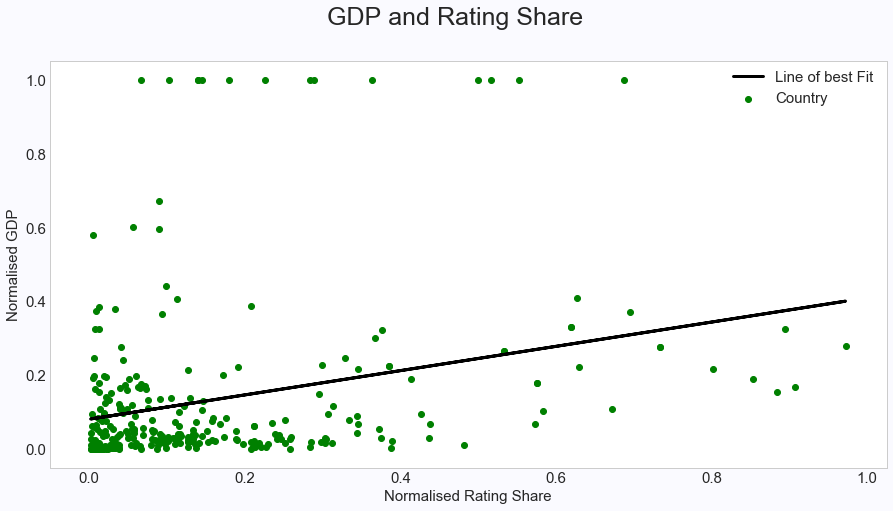

In [116]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('GDP and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_WINEffect.png')

# Normalised GDP Effect Summary 
** With Outliers ** <br>
Now we have analysised GDP without the otuliers United States, Japan, China and Germany. What we found is that the correlation does not get any better. There is still a positive effect that GDP has on  rating share however the correlation drops to 0.34 so once again is not conclusive.
<br>
** Without Outliers ** <br>
Without outliers that we calculated above the same effect is seen however when we take out these GDP outliers the correlation actually goes down. This is most likely because some of the GDP outliers for example USA, China and Germany might have extremly high GDP but have also won alot of medals and will have high rating share as a result. So in this case taking outliers out for GDP only makes the correlation worse. 

# GDP Per Capita Analysis 
After looking at GDP with Rating shares the best next step would be to look at GDP per Capita as judging from the Ratings relative graphs from above should yield different results. 

# GDP Per Capita Outliers 
Do get an insight into the GDP Per Capita outliers we will use a box plot again. <br>
The box plot whiskers show us the minium and maxium GDP Per Capita values thus giving us the range which we saw above. <br> 
The line within the box is the median GDP Per Capita value or middle value so half the GDP Per Capita values will be below this median and half will be above it. <br>
The box plot also gives us the 1st to 4th quartiles. <br><br>
** Outliers:**  <br>
The outliers in GDP Per Capita are not as numerous as the normal GDP outliers and they also belong to alot more countries than in the GDP outliers. Where the outliers only belonged to four countries. You'll see these countries below. 

In [117]:
# Calculating the outliers for the GDP column 
elements = np.array(df1.Norm_GDPPC)

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in df1.Norm_GDPPC if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [118]:
# Removing all countires but the ones with the GDP outliers calculated above
Outdf = df1[~df1['Norm_GDPPC'].isin(final_list)].reset_index()

** Outlier Countries **
From the List below we can see all the upper GDP outliers come for three countries America, Japan and China. These countries all have massive GDPs so we're not suprised they are outliers. In fact the mean GDP is only 5% of Americas GDP. 

** Below we can see the Outliers belong to multiple countries so removing them might not be the best idea. **

In [119]:
Outdf.Country.unique()

array(['Switzerland', 'Denmark', 'Norway', 'Sweden', 'United States',
       'Australia', 'Austria', 'Belgium', 'Canada', 'Finland', 'France',
       'United Kingdom', 'Germany', 'Ireland', 'Iceland', 'Netherlands',
       'Japan', 'Kuwait', 'Korea, Dem. People?s Rep.', 'Qatar', 'Singapore'], dtype=object)

In [120]:
df2  = df1

In [121]:
len(df2)

1198

In [122]:
df2 = df2[(np.abs(df2.Norm_GDP-df2.Norm_GDP.mean())>(3*df2.Norm_GDP.std()))]
print()

In [123]:
df2.Country.unique()

array(['United States', 'China', 'Japan'], dtype=object)

# Pandas Box Plot

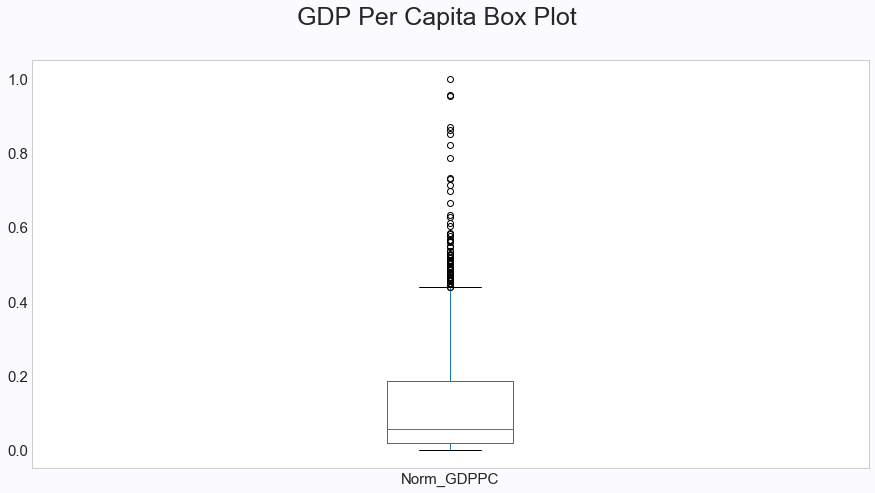

In [124]:
# Plotting the range 
fig, ax = plt.subplots(facecolor='#fafaff')

df1.Norm_GDPPC.plot(kind='box')
plt.grid()
plt.ylabel('')
fig.suptitle('GDP Per Capita Box Plot', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/GDPBoxPlot.png')

# Seaborn Box Plot 

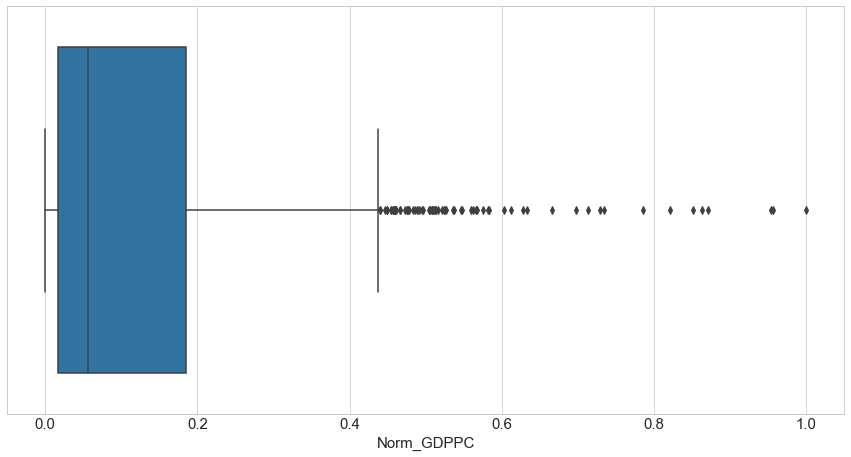

In [125]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df1["Norm_GDPPC"])

** GDP Per Capitas effect on Ratings Share ** 

In [126]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_GDPPC
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** GDP Per Capitas Correlation with Rating Share ** 

In [127]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_GDPPC)

0.094247641286692468

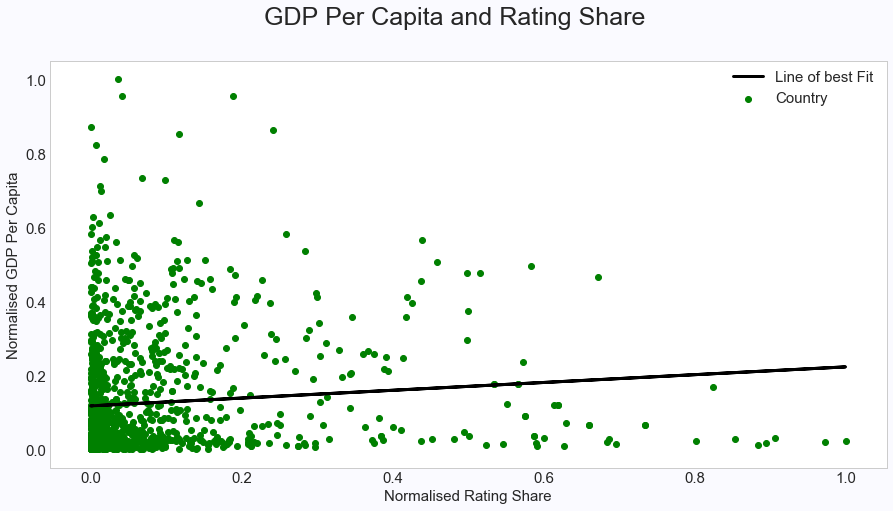

In [128]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP Per Capita')
fig.suptitle('GDP Per Capita and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDPPCEffect.png')

# GDP Per Capita Effect
** Without Outliers ** <br>
Now we'll look at GDP Per Capitas effect without the outliers. There are many outliers as seen from the calucation above so these results will not be used however we'll get them anyway. 

** Creating a df without the Outlier countries above ** 

In [129]:
noOutdf = df1[~df1['Country'].isin(Outdf.Country.unique())].reset_index()

** Line of Best Fit **

In [130]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = noOutdf.Norm_Rating_Share
y = noOutdf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
# The correlation between GDP and Rating Share 
noOutdf.Norm_Rating_Share.corr(noOutdf.Norm_GDPPC)

-0.00053168669149569118

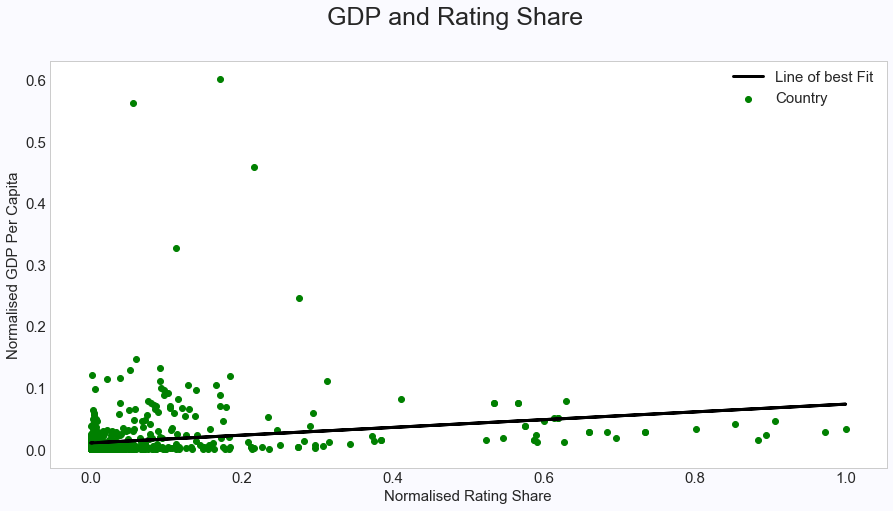

In [132]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP Per Capita')
fig.suptitle('GDP and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_Effect.png')

# Normalised GDP Per Capita Effect Summary 
** With Outliers ** <br>
After anaylising GDP Per Capita against rating share we can conclude that there is a small positive effect that GDP Per capita has on rating share however the effect not conclusive and has an extremely low correlation of only 0.9.
** Without Outliers ** <br>
Without outliers that we calculated above the correlation actally goes down alot to a negative correlation. This is because there are many outliers when it comes to GDP Per Capita see in this list: <br>
['Switzerland', 'Denmark', 'Norway', 'Sweden', 'United States','Australia', 'Austria', 'Belgium', 'Canada', 'Finland', 'France', United Kingdom', 'Germany', 'Ireland', 'Iceland', 'Netherlands', 'Japan', 'Kuwait', 'Korea, Dem. People?s Rep.', 'Qatar', 'Singapore']
<br>
Alot of these countries like in the normal GDP case above have a high rating share as well as high GDP Per Capita so taking them out as excepted reduces the correlation to so low its negatvie. We also asummed above that because of the amount of countries that we calculated as 'outliers' it would be a good idea to keep them in and not remove them. So the result we got will not be used. 